In [1]:
import glob
import os
import numpy as np
import pandas as pd
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

## GATHERING DATA

In [2]:
# Downloading the image-prediction files programmatically. 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [3]:
# Creating a data folder
if os.path.exists("data/") is False:
    os.mkdir("data/")
else:
    print("Path does not exist!")
# writing image-prediction contents to data folder
with open(os.path.join("data/", url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

Path does not exist!


##### Importing in downloaded data into Dataframe

In [4]:
# twitter archive dataset
twitter_archive = pd.read_csv("data/twitter-archive-enhanced.csv")
# nueral network dataset
image_pred = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

#### Downloading json file via tweepy from archive dataset tweet_id

In [6]:
n_id = twitter_archive.tweet_id.shape[0]
l = []
for i in range(n_id):
    with open("data/tweet_json.txt", 'w+') as f:
        try:
            tweet = api.get_status(twitter_archive.tweet_id[i], tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            l.append(tweet._json)
            json.dump(l, f, ensure_ascii=False)
        except:
            print("error")
        print(twitter_archive.tweet_id[i])

In [7]:
def get_tweet_dict(keywords, path):
    '''
    This function outputs a dictionary
    with keyswords input.
    '''
    # keyword list length should stop at 5.
    assert len(keywords) == 3, "5 keywords needed!" 
    # opening up the json path
    with open(path) as json_file:
        data = json.load(json_file)
    # creating a list for queried keywords
    l = [[],[], []]
    # number of inputs in dataset
    num = len(data)
    # looping thought the keywords and appending
    for i in range(num):
        cnt = 0
        key_l = []
        for key in keywords:
            l[cnt].append(data[i][key])
            cnt+=1
    tweet_dict = {keywords[0]:l[0],
                  keywords[1]:l[1],
                  keywords[2]:l[2]}
    return tweet_dict, data


# Keyword list
keywords = ["id",
            "retweet_count",
            "favorite_count"]
# path to tweet_data
path = 'data/tweet_json.txt'
# tweet dictionary output with keywords
tweet_dict, data = get_tweet_dict(keywords, path)
# creating a dataframe from dictionary
df_tweet = pd.DataFrame.from_dict(tweet_dict)    

## Acessesing the DATA

#### Visual Assesment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,7606,35881
1,892177421306343426,5635,30948
2,891815181378084864,3729,23293
3,891689557279858688,7775,39145
4,891327558926688256,8385,37399
...,...,...,...
2171,666049248165822465,40,96
2172,666044226329800704,130,269
2173,666033412701032449,41,111
2174,666029285002620928,42,120


#### Programmatic Assesment

In [11]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2176 non-null   int64
 1   retweet_count   2176 non-null   int64
 2   favorite_count  2176 non-null   int64
dtypes: int64(3)
memory usage: 51.1 KB


In [12]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Quality
- in_reply_status_id -- missing values 
- in_reply_user_id -- mising values 
- retweeted_status_id -- missing values
- retweeted_status_user_id -- missing values
- retweeted_status_timestamp -- missing values
- expanded_urls -- missing values
- tweet_id -- tweet id should be a string instead of int
- ! --- doggo, floofer, pupper, puppo --- all set to none and should be dropped
- remove names "the, an, a, None"

#### Tidyness 
- combine numerator and denominator of rating system to 1 column
- drop retweeted_status_id, retweeted_status_timestamp, and retweeted_status_user_id
- drop tweets past august 1st 2017

## Cleaning Data

### Define
- Copy dataframe and rename id to tweet id

In [14]:
df_clean = twitter_archive.copy()
df_tweet.rename(columns={"id":"tweet_id"}, inplace=True)

### Test

In [15]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7606,35881
1,892177421306343426,5635,30948
2,891815181378084864,3729,23293
3,891689557279858688,7775,39145
4,891327558926688256,8385,37399


#### Define
- Remove Nan Values
- Change timestamp to date-time
- convert rating_numerator, and denominator to str 
-  create single column called ratings and combine into df_clean

In [16]:
# Dropping columns with Nan Values
df_clean = df_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', "in_reply_to_status_id", "in_reply_to_user_id"], axis=1)

In [17]:
# coverting tweet id to string
df_tweet["tweet_id"] = df_tweet["tweet_id"].astype(str)
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_pred['tweet_id'] = image_pred['tweet_id'].astype(str)

In [18]:
df_clean = pd.merge(df_clean, df_tweet, left_on='tweet_id', right_on='tweet_id', how='left')

In [19]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2176 non-null   object
 1   retweet_count   2176 non-null   int64 
 2   favorite_count  2176 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 51.1+ KB


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                2356 non-null   object 
 8   doggo               2356 non-null   object 
 9   floofer             2356 non-null   object 
 10  pupper              2356 non-null   object 
 11  puppo               2356 non-null   object 
 12  retweet_count       2176 non-null   float64
 13  favorite_count      2176 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 276.1+ KB


In [21]:
# convert timestamp into datae time
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [22]:
# converting the numerator and denominator into strings
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(str)
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(str)

In [23]:
# combining numerator and denominator and creat a dataframe
n = 2356
rating_l = [df_clean.rating_numerator[i] + "/" + df_clean.rating_denominator[i] for i in range(n)]
rating_dict = {"rating":rating_l}
rating_df = pd.DataFrame.from_dict(rating_dict)

In [24]:
# concatinating dataframes
df_clean = pd.concat([df_clean, rating_df], axis=1)

#### Test

In [25]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7606.0,35881.0,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5635.0,30948.0,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3729.0,23293.0,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,7775.0,39145.0,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8385.0,37399.0,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,40.0,96.0,5/10
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,130.0,269.0,6/10
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,41.0,111.0,9/10
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,42.0,120.0,7/10


#### Define
- drop "rating_numerator", "rating_denominator", "doggo", "floofer", "pupper", "puppo"
- merge image_pred dataframe, and df_clean
- drop NaN columns
- check for duplicates
- remove redundant names

In [26]:
# droping columns 
df_clean = df_clean.drop(["rating_numerator", "rating_denominator", "doggo", "floofer", "pupper", "puppo"], axis=1)

In [27]:
# combining df_clean and image_pred
df_clean = df_clean.merge(image_pred, how='left', left_on='tweet_id', right_on='tweet_id')

In [28]:
# drop Nan values
df_clean = df_clean.dropna()

In [29]:
df_clean = df_clean.query('name != "the" and name != "None" and name != "a" and name != "an"')

In [30]:
# checking for duplicates
sum(df_clean.duplicated())

0

In [31]:
# coverting tweet id to string
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 2326
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1328 non-null   object             
 1   timestamp       1328 non-null   datetime64[ns, UTC]
 2   source          1328 non-null   object             
 3   text            1328 non-null   object             
 4   expanded_urls   1328 non-null   object             
 5   name            1328 non-null   object             
 6   retweet_count   1328 non-null   float64            
 7   favorite_count  1328 non-null   float64            
 8   rating          1328 non-null   object             
 9   jpg_url         1328 non-null   object             
 10  img_num         1328 non-null   float64            
 11  p1              1328 non-null   object             
 12  p1_conf         1328 non-null   float64            
 13  p1_dog          1328 non-null   o

## Storing

In [33]:
df_clean.to_csv("data/twitter_archive_master.csv")

#### Visualizing  and Analyzing data

In [34]:
# downloading contents via url
r = requests.get(df_clean.jpg_url[0])

In [35]:
# storing image via memory
im = Image.open(BytesIO(r.content))

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


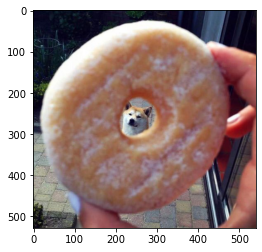

In [36]:
# displaying image
plt.imshow(im)
print(df_clean.text[0]);

In [37]:
# copy and query only dogs
df_dog = df_clean.copy()
df_dog = df_dog.query('p1_dog == True and p2_dog == True and p3_dog == True')

In [38]:
# Query only predictions past 60%
df_dog  = df_dog.query('p1_conf >= 0.6 or p2_conf >= 0.6 or p3_conf >= 0.6')

In [39]:
# reset the index
df_dog.reset_index(drop=True, inplace=True)

In [40]:
# this function gets only the highest prediction
def get_pred(idx, df):
    if df.p1_conf[idx] > df.p2_conf[idx] or df.p1[idx] > df.p3_conf[idx]:
        return df.p1[idx]

    elif df.p2_conf[idx] > df.p1_conf[idx] or df.p2_conf[idx] > df.p3_conf[idx]:
        return df_dog.p2[idx]

    elif df.p3_conf[idx] > df.p2_conf[idx] or df.p3_conf[idx] > df.p1_conf[idx]:
        return df_dog.p3[idx]
    else:
        return None

def display_tweet(rating, index):
    dog = df_dog[df_dog.rating == rating].reset_index()
    text = dog.text[index]
    r = requests.get(dog.jpg_url[index])
    im = Image.open(BytesIO(r.content))
    pred = get_pred(index, dog)
    print(text)
    plt.imshow(im);
    print("Dog prediction: {}".format(pred))
    return dog

In [41]:
# looking for the dog with the heighest ratings
rating_l = list(set(df_dog.rating))

## Insights 
### The highest numerator dog picture is Sophie with a rate of 27/10

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Dog prediction: clumber


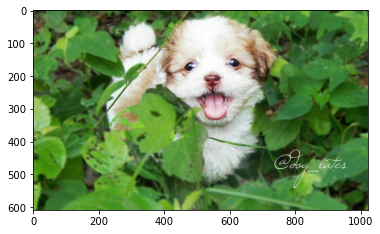

In [42]:
dog = display_tweet("27/10", 0)

### The highest rating is 12/10

In [44]:
# checking rating counts
for i in range(len(rating_l)):
    num = df_dog[df_dog.rating == rating_l[i]].shape[0]
    print("number of ratings {}-- {}".format(rating_l[i], num))

number of ratings 24/7-- 1
number of ratings 12/10-- 126
number of ratings 8/10-- 18
number of ratings 11/10-- 104
number of ratings 10/10-- 85
number of ratings 5/10-- 4
number of ratings 27/10-- 1
number of ratings 6/10-- 2
number of ratings 13/10-- 73
number of ratings 9/10-- 28
number of ratings 2/10-- 1
number of ratings 14/10-- 7
number of ratings 7/10-- 3


### Majority of dogs got under 20,000 likes

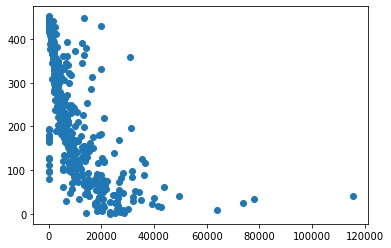

In [133]:
# Checking to see which dogs are the most favorited
x = list(df_dog.favorite_count)
y = range(len(x))
plt.scatter(x, y);

### The Majority of retweets are less than 5000

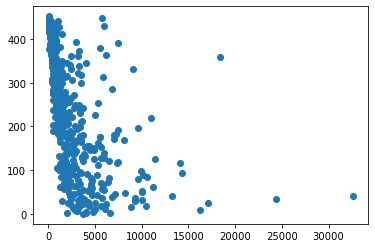

In [134]:
# Checking to see which dogs are the most retweeted
x = list(df_dog.retweet_count)
y = range(len(x))
plt.scatter(x, y);

### Visualizing the top 4 images which were over 15000 Retweets

In [54]:
# Querying the top retweets
retweet_images_l = []
most_retweet = df_dog[df_dog.retweet_count > 15000]
most_retweet_url_l = most_retweet.jpg_url.to_list()
most_retweet_count = most_retweet.retweet_count.to_list()
most_retweet_name =  most_retweet.name.to_list()
for url_ in most_retweet_url_l:
    r = requests.get(url_)
    im = Image.open(BytesIO(r.content))
    retweet_images_l.append(im)

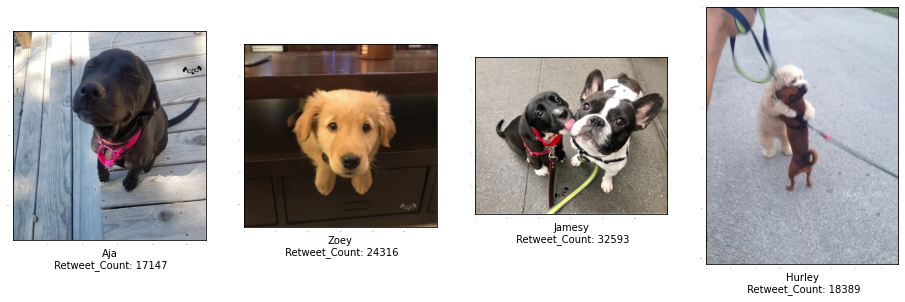

In [55]:
# Top Retweeted images
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 1
for i in range(1, columns*rows):
    fig.add_subplot(rows, columns, i)
    plt.imshow(retweet_images_l[i]);
    plt.tick_params(axis='both', labelsize=0, length = 0)
    plt.xlabel("{}\n Retweet_Count: {}".format( most_retweet_name[i], int(most_retweet_count[i])))
    

#### Visualizing the top 3 Favorite images greater than 60000 

In [59]:
# Querying Top Favorited Dogs
favorite_dogs = df_dog[df_dog.favorite_count > 60000]

favorite_images_l = []
favorite_url_l = favorite_dogs.jpg_url.to_list()
favorite_count = favorite_dogs.favorite_count.to_list()
favorite_name =  favorite_dogs.name.to_list()

for url_ in favorite_url_l:
    r = requests.get(url_)
    im = Image.open(BytesIO(r.content))
    favorite_images_l.append(im)

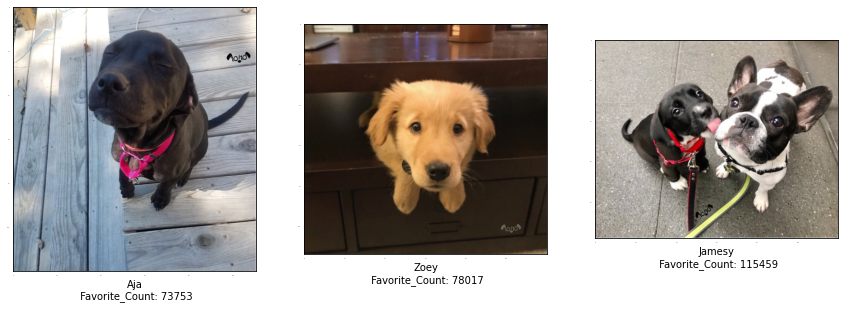

In [65]:
# Top favorite images
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 1
for i in range(1, columns*rows):
    fig.add_subplot(rows, columns, i)
    plt.imshow(favorite_images_l[i]);
    plt.tick_params(axis='both', labelsize=0, length = 0)
    plt.xlabel("{}\n Favorite_Count: {}".format( favorite_name[i], int(favorite_count[i])))
    

#### French Bulldogs are the most retweeted, and favorited dog out of the whole dataset 

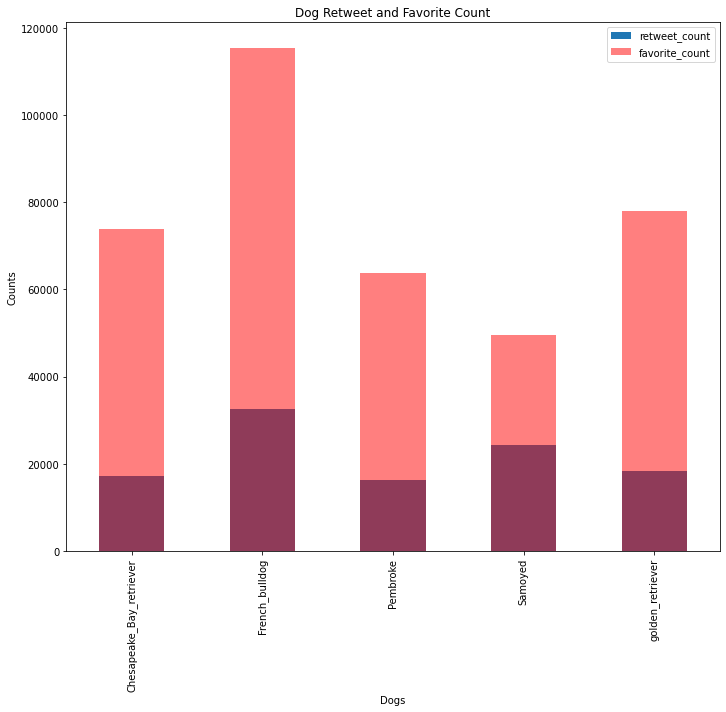

In [152]:
df_dog[df_dog.retweet_count >= 15000].groupby("p1")['retweet_count'].mean().plot(kind="bar", figsize=(10, 10))
df_dog[df_dog.favorite_count >= 45000].groupby("p1")['favorite_count'].mean().plot(kind="bar", figsize=(10, 10), color="r", alpha=0.5)
plt.legend()
plt.title("Dog Retweet and Favorite Count")
plt.xlabel("Dogs")
plt.tight_layout()
plt.ylabel("Counts");

#### Most users post Golden Retriever it appears to be the most Favorited Dog posted

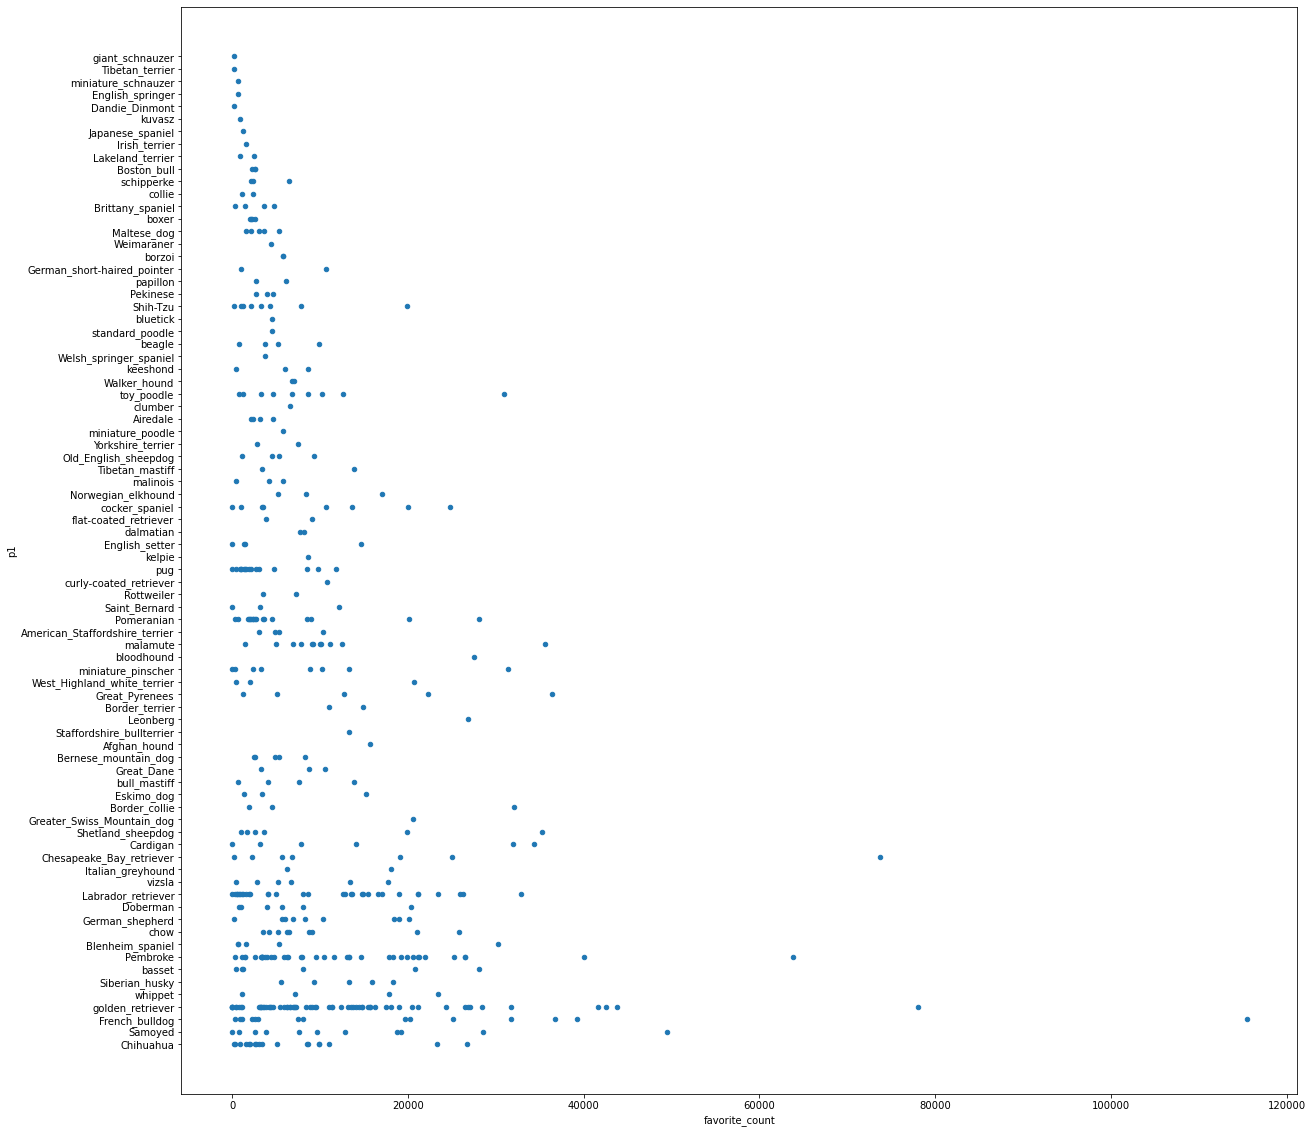

In [221]:
df_dog.plot("favorite_count", "p1", kind="scatter", figsize=(20, 20))